<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/Image__Resnet_%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

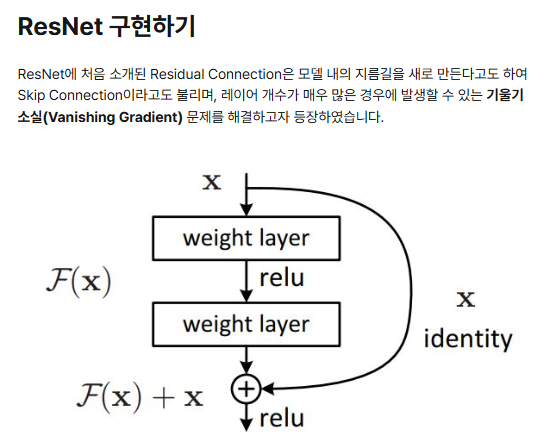

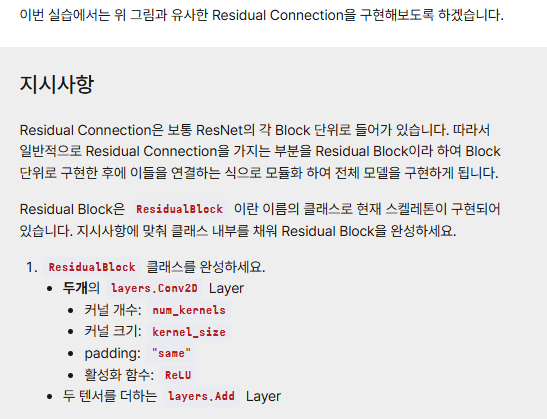

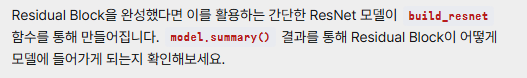

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Sequential

class ResidualBlock(Model):
    def __init__(self, num_kernels, kernel_size):
        super(ResidualBlock, self).__init__()

        # TODO: [지시사항 1번] 2개의 Conv2D Layer를 지시사항에 따라 추가하세요.
        self.conv1 = layers.Conv2D(num_kernels, kernel_size=kernel_size, padding="same", activation="relu")
        self.conv2 = layers.Conv2D(num_kernels, kernel_size=kernel_size, padding="same", activation="relu")

        self.relu = layers.Activation("relu")

        # TODO: [지시사항 1번] Add Layer를 추가하세요.
        self.add = layers.Add() # x, y 텐서가 있을때 Add([x, y]) 로 묶어주면 하나로 더해준다.

    def call(self, input_tensor):
        x = self.conv1(input_tensor) # 그림에서 x
        x = self.conv2(x) # 그림에서 F(x)

        x = self.add([x, input_tensor]) # 두 값을 더하는 과정 / 그림에서 F(x) + x 하는 과정
        x = self.relu(x) # 그림 가장 아래 relu 과정

        return x

def build_resnet(input_shape, num_classes):
    model = Sequential()

    model.add(layers.Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu", input_shape=input_shape))
    model.add(layers.MaxPool2D(2))

    model.add(ResidualBlock(64, (3, 3)))
    model.add(ResidualBlock(64, (3, 3)))
    model.add(ResidualBlock(64, (3, 3)))

    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(num_classes, activation="softmax"))

    return model

def main():
    input_shape = (32, 32, 3)
    num_classes = 10

    model = build_resnet(input_shape, num_classes)
    model.summary()

if __name__=="__main__":
    main()



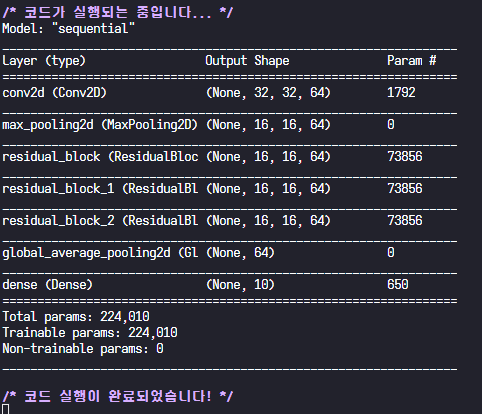